In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool1D,Conv1D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

print(tf.__version__)

2.6.0


In [79]:
cancer = load_breast_cancer()

In [80]:
#print(cancer.DESCR)

In [81]:
X = pd.DataFrame(data = cancer.data , columns = cancer.feature_names)

print("X Shape : {}".format(X.shape))

X Shape : (569, 30)


In [82]:
y = cancer.target

print("Y Shape : {}".format(y.shape))

Y Shape : (569,)


In [83]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
pd.DataFrame(data = y).head()

,0
0,0
1,0
2,0
3,0
4,0


In [85]:
# Model Selection

X_train, X_test, y_train , y_test = train_test_split(X, y , random_state = 0 , test_size = 0.2, stratify = y)

In [86]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [87]:
# Standard Scaler

scaler = MinMaxScaler(feature_range = (0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_train = np.array(X_train).reshape(455, 30, 1)
X_test = np.array(X_test).reshape(114, 30, 1)

X_train.shape, X_test.shape

((455, 30, 1), (114, 30, 1))

In [89]:
# Model CNN

model = Sequential()

model.add(Conv1D(filters = 32, kernel_size = 2 , activation = "relu", input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.2))

model.add(Conv1D(filters = 64, kernel_size = 2 , activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.5))

model.add(Flatten())
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 1 , activation = "sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [90]:
model.compile(optimizer = Adam(learning_rate = 0.00005), loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 50 , validation_data = (X_test, y_test))

Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 0.9054 - accuracy: 0.6132 - val_loss: 0.6869 - val_accuracy: 0.3860
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5491 - accuracy: 0.7582 - val_loss: 0.6798 - val_accuracy: 0.5263
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3509 - accuracy: 0.8527 - val_loss: 0.6712 - val_accuracy: 0.7982
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4243 - accuracy: 0.8154 - val_loss: 0.6610 - val_accuracy: 0.9474
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3415 - accuracy: 0.8549 - val_loss: 0.6488 - val_accuracy: 0.9386
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2609 - accuracy: 0.8769 - val_loss: 0.6378 - val_accuracy: 0.9386
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.2382 - accuracy: 0.9187 - val_loss: 0.6247 - val_accuracy: 0.9386
Epoch 8/50
15/15 [

In [91]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), history.history["accuracy"], label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1),history.history["loss"],label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [92]:
def confusion_graph(y_true, y_pred, classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, cbar = False, cmap = "viridis", annot_kws= {"size" : 15}, fmt = "d", xticklabels=classes , yticklabels = classes )
    
    size = 15
    plt.xlabel("Predicted",fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix" , fontsize = size)

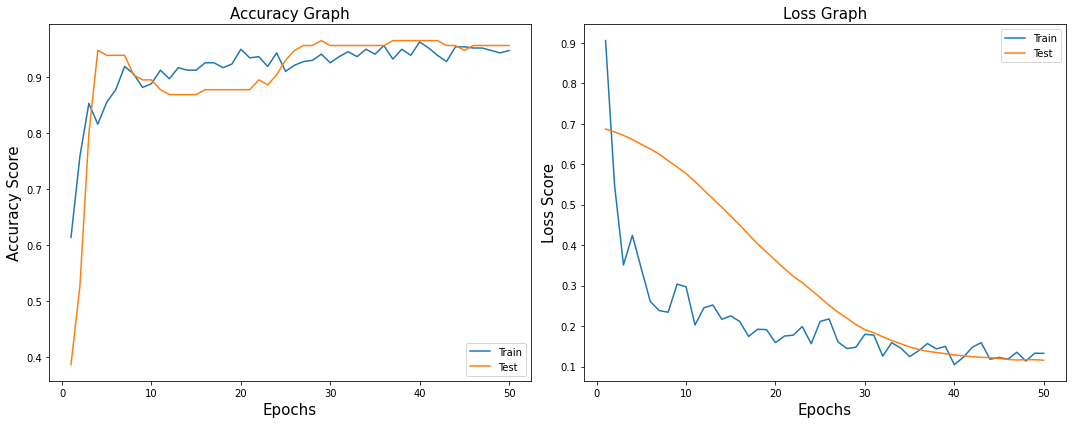

In [93]:
history_graph(history, 50)

In [101]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred) 
y_pred[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

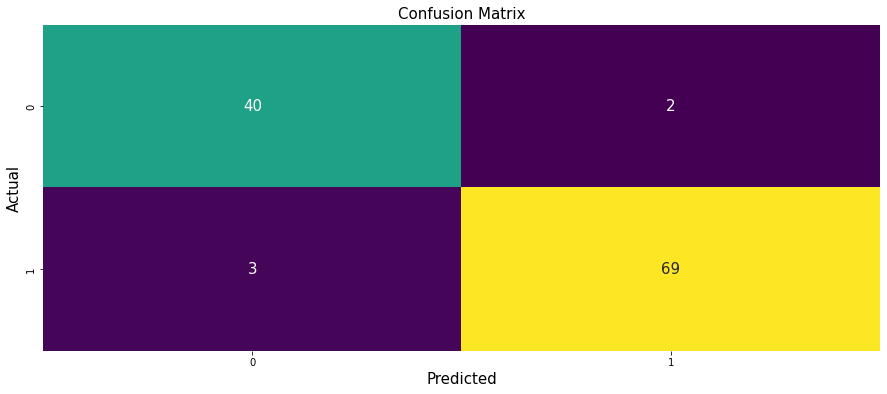

In [102]:
confusion_graph(y_test, y_pred)